# Using PaliGemma (vision language model)

In [ ]:
!pip install -q -U accelerate bitsandbytes git+https://github.com/huggingface/transformers.git

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

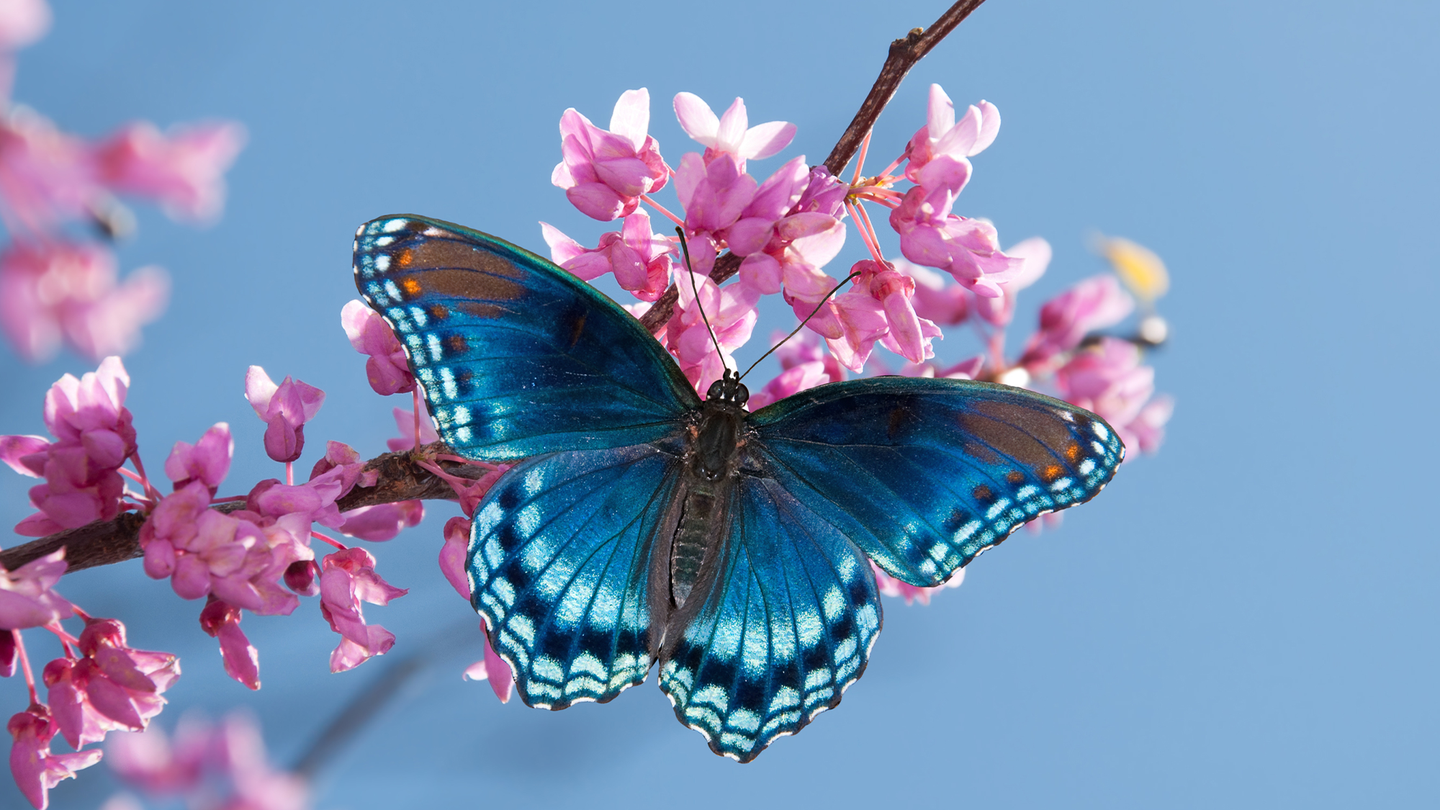

In [6]:
import torch
import numpy as np
from PIL import Image
import requests
from IPython.display import display

input_text = "What is the color of the butterfly?"

img_url = "https://www.popsci.com/uploads/2023/05/15/ButterflyFamilyTree.png?auto=webp&optimize=high&width=1440"


response = requests.get(img_url, stream=True)
input_image = Image.open(response.raw)

display(input_image)


In [7]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/paligemma-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16)
processor = PaliGemmaProcessor.from_pretrained(model_id)

In [8]:
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

In [9]:
print("")


In [1]:
with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

print(processor.decode(output[0], skip_special_tokens=True))

What is the color of the butterfly?
blue
